# Lesson 1: Introduction to Random Forests

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [11]:
PATH = "data/bulldozers/"

In [10]:
!ls
!pwd
!ls data/bulldozers

data  Lesson1.ipynb  README.md	Untitled.ipynb
/private/andro/ds/fast-ai-machine-learning-1
Data Dictionary.xlsx		  Train.7z	     Valid.7z
Machine_Appendix.csv		  TrainAndValid.7z   Valid.csv
median_benchmark.csv		  TrainAndValid.csv  ValidSolution.csv
random_forest_benchmark_test.csv  TrainAndValid.zip  Valid.zip
README.md			  Train.csv
Test.csv			  Train.zip


In [22]:
df_raw = pd.read_csv(f"{PATH}Train.csv", low_memory=False, parse_dates=["saledate"])

In [23]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [25]:
df_raw.tail().transpose()

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [40]:
print("Unique values per column")
for col in df_raw.columns:
    print(col, "\t\t", len(df_raw[col].unique()), "\t\t", type(df_raw[col][0]))

Unique values per column
SalesID 		 401125 		 <class 'numpy.int64'>
SalePrice 		 899 		 <class 'numpy.int64'>
MachineID 		 341027 		 <class 'numpy.int64'>
ModelID 		 5218 		 <class 'numpy.int64'>
datasource 		 5 		 <class 'numpy.int64'>
auctioneerID 		 31 		 <class 'numpy.float64'>
YearMade 		 72 		 <class 'numpy.int64'>
MachineHoursCurrentMeter 		 15153 		 <class 'numpy.float64'>
UsageBand 		 4 		 <class 'str'>
saledate 		 3919 		 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
fiModelDesc 		 4999 		 <class 'str'>
fiBaseModel 		 1950 		 <class 'str'>
fiSecondaryDesc 		 176 		 <class 'str'>
fiModelSeries 		 123 		 <class 'float'>
fiModelDescriptor 		 140 		 <class 'float'>
ProductSize 		 7 		 <class 'float'>
fiProductClassDesc 		 74 		 <class 'str'>
state 		 53 		 <class 'str'>
ProductGroup 		 6 		 <class 'str'>
ProductGroupDesc 		 6 		 <class 'str'>
Drive_System 		 5 		 <class 'float'>
Enclosure 		 7 		 <class 'str'>
Forks 		 3 		 <class 'str'>
Pad_Type 		 5 		 <class 'float'>
Ride

In [41]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

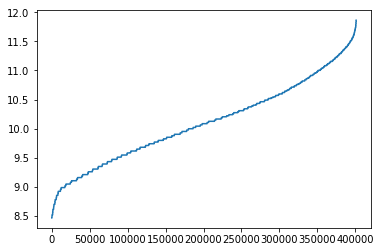

In [45]:
plt.plot(sorted(df_raw.SalePrice))
plt.show()

# Accuracy on training set when dropping all non-numeric colums and setting NaN = 0

In [59]:
df_raw_only_numerics = df_raw.select_dtypes(include=[np.number]).fillna(0)
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw_only_numerics.drop(["SalePrice"], axis=1), df_raw_only_numerics.SalePrice)

/private/andro/anaconda3/envs/fastai-old/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
error = np.mean((m.predict(df_raw_only_numerics.drop(["SalePrice"], axis=1)) - df_raw_only_numerics.SalePrice)**2)
1-error

0.9843463503752714

# Feature engineering on dates

* Holiday?
* Weekend
* Was it raining that day?
* Was it a sports event that day?
* One of the most important places to do feature engineering.

In [71]:
add_datepart(df_raw, "saledate")

KeyError: 'saledate'

In [76]:
[col for col in df_raw.columns if "sale" in col]

['saleYear',
 'saleMonth',
 'saleWeek',
 'saleDay',
 'saleDayofweek',
 'saleDayofyear',
 'saleIs_month_end',
 'saleIs_month_start',
 'saleIs_quarter_end',
 'saleIs_quarter_start',
 'saleIs_year_end',
 'saleIs_year_start',
 'saleElapsed']

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0


# Creating categorical variables

In [83]:
train_cats(df_raw)

In [86]:
print("Unique values per column")
for col in df_raw.columns:
    print(col, "\t\t", df_raw[col].dtype, "\t\t", type(df_raw[col][0]))

Unique values per column
SalesID 		 int64 		 <class 'numpy.int64'>
SalePrice 		 float64 		 <class 'numpy.float64'>
MachineID 		 int64 		 <class 'numpy.int64'>
ModelID 		 int64 		 <class 'numpy.int64'>
datasource 		 int64 		 <class 'numpy.int64'>
auctioneerID 		 float64 		 <class 'numpy.float64'>
YearMade 		 int64 		 <class 'numpy.int64'>
MachineHoursCurrentMeter 		 float64 		 <class 'numpy.float64'>
UsageBand 		 category 		 <class 'str'>
fiModelDesc 		 category 		 <class 'str'>
fiBaseModel 		 category 		 <class 'str'>
fiSecondaryDesc 		 category 		 <class 'str'>
fiModelSeries 		 category 		 <class 'float'>
fiModelDescriptor 		 category 		 <class 'float'>
ProductSize 		 category 		 <class 'float'>
fiProductClassDesc 		 category 		 <class 'str'>
state 		 category 		 <class 'str'>
ProductGroup 		 category 		 <class 'str'>
ProductGroupDesc 		 category 		 <class 'str'>
Drive_System 		 category 		 <class 'float'>
Enclosure 		 category 		 <class 'str'>
Forks 		 category 		 <class 'str'>
Pad_T

Use "train_cats" to convert ALL columns with string data into categories.
Use "apply_cats" to convert all columns in the same for validation/test as with the training set.

### Fix ordering for categories

In [108]:
for col in df_raw.columns:
    try:
        cat = df_raw[col].cat
        print(cat.name, cat.categories)
        print()
    except:
        pass

UsageBand Index(['High', 'Medium', 'Low'], dtype='object')

fiModelDesc Index(['100C', '104', '1066', '1066E', '1080', '1080B', '1088', '1088CK',
       '1088LT', '1088TTL',
       ...
       'ZX600LC', 'ZX70', 'ZX75', 'ZX75US', 'ZX75USA', 'ZX80', 'ZX800',
       'ZX800LC', 'ZX80LCK', 'ZX850H'],
      dtype='object', length=4999)

fiBaseModel Index(['10', '100', '104', '1066', '1080', '1088', '10DG', '11', '110', '1105',
       ...
       'ZX370', 'ZX450', 'ZX460', 'ZX50', 'ZX600', 'ZX70', 'ZX75', 'ZX80',
       'ZX800', 'ZX850'],
      dtype='object', length=1950)

fiSecondaryDesc Index([' MSR SPIN ACE', '#NAME?', '-2', '-3', '-5', '-5L', '-6', '-7', '0.7',
       '1',
       ...
       'XP', 'XT', 'Z', 'ZF', 'ZHS', 'ZHS G', 'ZT', 'ZTM', 'ZTS', 'ZX'],
      dtype='object', length=175)

fiModelSeries Index([' III', '#NAME?', '-1', '-1.50E+01', '-11', '-12', '-15', '-16', '-17',
       '-18',
       ...
       'V-2', 'VHP', 'VI', 'WT', 'WX', 'XLT', 'XT', 'ZHS', 'ZTS', 'ZX'],
      dtype

/private/andro/anaconda3/envs/fastai-old/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.cat.name` has been deprecated. Use `Series.name` instead.
  after removing the cwd from sys.path.


Some categories that are not properly sorted:


* Grouser_Type (should be "Single", "Double", "Triple")
* Stick_Length (sort numerically)
* Tire_Size (sort numerically)
* Blade_Width (has "<12" in a numerical sequence)
* Drive_System ("No" should be above/below "Two Wheel Drive")
* UsageBand should be "Low", "Medium", "Hight"

Some things that should be NaN or missing: '#NAME?'

## Fixing UsageBand category ordering

In [112]:
df_raw.UsageBand.cat.set_categories(
    ["High", "Medium", "Low"],
    ordered=True, inplace=True)

df_raw.ProductSize.cat.set_categories(
    ['Large', 'Large / Medium', 'Medium', 'Compact', 'Small', 'Mini'],
    ordered=True, inplace=True)

df_raw.Grouser_Type.cat.set_categories(
    ['Single', 'Double', 'Triple'],
    ordered=True, inplace=True)

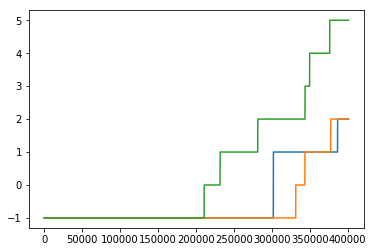

In [126]:
plt.show()
plt.plot(sorted(df_raw.Grouser_Type.cat.codes))
plt.plot(sorted(df_raw.UsageBand.cat.codes))
plt.plot(sorted(df_raw.ProductSize.cat.codes))

# Fix NaNs and missing values

In [136]:
df_raw.isnull().sum().sort_index().sort_values(ascending=False)/len(df_raw)

Blade_Width                0.960272
Engine_Horsepower          0.937129
Tip_Control                0.937129
Blade_Extension            0.937129
Pushblock                  0.937129
Enclosure_Type             0.937129
Scarifier                  0.937102
Hydraulics_Flow            0.891899
Grouser_Tracks             0.891899
Coupler_System             0.891660
fiModelSeries              0.858129
Steering_Controls          0.827064
Differential_Type          0.826959
UsageBand                  0.826391
fiModelDescriptor          0.820707
Backhoe_Mounting           0.803872
Stick                      0.802720
Pad_Type                   0.802720
Turbocharged               0.802720
Blade_Type                 0.800977
Travel_Controls            0.800975
Tire_Size                  0.763869
Grouser_Type               0.752813
Track_Type                 0.752813
Pattern_Changer            0.752651
Stick_Length               0.752651
Thumb                      0.752476
Undercarriage_Pad_Width    0

## Save to disk

In [140]:
os.makedirs(f"{PATH}tmp", exist_ok=True)
df_raw.to_feather(f"{PATH}tmp/raw")

In [141]:
!ls -lah {PATH}tmp/

total 67M
drwxrwxr-x 2 andro andro   17 Mar 20 10:15 .
drwxrwxr-x 3 andro andro 4.0K Mar 20 10:14 ..
-rw-r--r-- 1 andro andro  67M Mar 20 10:15 raw


In [142]:
pd_raw = pd.read_feather(f"{PATH}tmp/raw")

In [153]:
df, y, wat = proc_df(df_raw, "SalePrice")
wat

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}

In [150]:
?proc_df

Replace values with their category codes.

Scale variables.

In [151]:
?fix_missing

Replace NaN and missing with median of column.

In [152]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [154]:
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


In [157]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y)

/private/andro/anaconda3/envs/fastai-old/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9831123927487762

In [158]:
def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

n_valid = 12000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 66), (389125,), (12000, 66), (12000,))

In [159]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print("Training score: ", m.score(X_train, y_train))
print("Validation score: ", m.score(X_valid, y_valid))

/private/andro/anaconda3/envs/fastai-old/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training score:  0.9829087627553603
Validation score:  0.8883931391436494


Very high training vs validation score, hints at overfitting.

In [163]:
print("nfeatures", .n_features_)

66

In [161]:
?RandomForestRegressor

In [172]:
m = RandomForestRegressor(n_jobs=-1, max_depth=30, max_features=60)
m.fit(X_train, y_train)
print("Training score: ", m.score(X_train, y_train))
print("Validation score: ", m.score(X_valid, y_valid))




/private/andro/anaconda3/envs/fastai-old/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training score:  0.9824133284498169
Validation score:  0.892008902045913
